In [90]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 両端に0を追加する関数
def R(a):
    A = [0]
    for i in range(len(a)):
        A.append(a[i])
    A.append(0)
    return A

# 境界線を越えるための関数
def L(a):
    A = []
    for i in range(len(a)):
        if i%2==0:
            A.append(a[i])
        if i%2==1:
            A.append(1-a[i])
    return A

# 面を埋める関数
def write(a,b,c):
    if (a+b+c)%2==0:
        return 1
    if (a+b+c)%2==1:
        return 0
    
# xy平面の塗り分け関数    
def xy(a):
    if a==0:
        return 2
    if a==1:
        return 4
    
# yz平面の塗り分け関数    
def yz(a):
    if a==0:
        return 4
    if a==1:
        return 6
    
# zx平面の塗り分け関数    
def zx(a):
    if a==0:
        return 6
    if a==1:
        return 2
    
# 赤だけ薄くする関数
def pr(a):
    if a==2:
        a=3
    return a

# 緑だけ薄くする関数
def pg(a):
    if a==4:
        a=5
    return a

# 青だけ薄くする関数
def pb(a):
    if a==6:
        a=7
    return a

# 間に0を挟む関数
def zero(a):
    zero = [0]
    for i in range(len(a)):
        zero.append(a[i])
        zero.append(0)
    return zero

# 数列の奇数番目を抜く関数
def remove_odd(a):
    re_odd=[]
    for i in range(len(a)):
        if i%2==1:
            re_odd.append(a[i])
    return re_odd

def generate_cube(x, y, z):

    rx = R(x)
    ry = R(y)
    rz = R(z)

    lx = L(rx)
    ly = L(ry)
    lz = L(rz)

    crx = zero(rx)
    cry = zero(ry)
    crz = zero(rz)

    clx = zero(lx)
    cly = zero(ly)
    clz = zero(lz)

    fxy_0 = np.zeros((len(rx),len(ly)))
    for i in range(len(rx)):
        fxy_0[i][0]=rx[i]
    for i in range(len(ly)):
        fxy_0[0][i]=ly[i]
    for i in range(1,len(rx)):
        for j in range(1,len(ly)):
            fxy_0[i][j]=write(fxy_0[i-1][j],fxy_0[i][j-1],fxy_0[i-1][j-1])

    fyz_0 = np.zeros((len(ry),len(lz)))
    for i in range(len(ry)):
        fyz_0[i][0]=ry[i]
    for i in range(len(lz)):
        fyz_0[0][i]=lz[i]
    for i in range(1,len(ry)):
        for j in range(1,len(lz)):
            fyz_0[i][j]=write(fyz_0[i-1][j],fyz_0[i][j-1],fyz_0[i-1][j-1])

    fzx_0 = np.zeros((len(rz),len(lx)))
    for i in range(len(rz)):
        fzx_0[i][0]=rz[i]
    for i in range(len(lx)):
        fzx_0[0][i]=lx[i]
    for i in range(1,len(rz)):
        for j in range(1,len(lx)):
            fzx_0[i][j]=write(fzx_0[i-1][j],fzx_0[i][j-1],fzx_0[i-1][j-1])

    ezx_x = []
    for i in range(len(rx)):
        ezx_x.append(fzx_0[len(rz)-1][i])
    urx = L(ezx_x)

    exy_x = []
    for i in range(len(lx)):
        exy_x.append(fxy_0[i][len(ry)-1])
    ulx = L(exy_x)

    exy_y = []
    for i in range(len(ry)):
        exy_y.append(fxy_0[len(rx)-1][i])
    ury = L(exy_y)

    eyz_y = []
    for i in range(len(ly)):
        eyz_y.append(fyz_0[i][len(rz)-1])
    uly = L(eyz_y)

    eyz_z = []
    for i in range(len(rz)):
        eyz_z.append(fyz_0[len(ry)-1][i])
    urz = L(eyz_z)

    ezx_z = []
    for i in range(len(lz)):
        ezx_z.append(fzx_0[i][len(rx)-1])
    ulz = L(ezx_z)

    fxy_1 = np.zeros((len(urx),len(uly)))
    for i in range(len(urx)):
        fxy_1[i][0]=urx[i]
    for i in range(len(uly)):
        fxy_1[0][i]=uly[i]
    for i in range(1,len(rx)):
        for j in range(1,len(ly)):
            fxy_1[i][j]=write(fxy_1[i-1][j],fxy_1[i][j-1],fxy_1[i-1][j-1])

    fyz_1 = np.zeros((len(ury),len(ulz)))
    for i in range(len(ury)):
        fyz_1[i][0]=ury[i]
    for i in range(len(ulz)):
        fyz_1[0][i]=ulz[i]
    for i in range(1,len(ury)):
        for j in range(1,len(ulz)):
            fyz_1[i][j]=write(fyz_1[i-1][j],fyz_1[i][j-1],fyz_1[i-1][j-1])

    fzx_1 = np.zeros((len(urz),len(ulx)))
    for i in range(len(urz)):
        fzx_1[i][0]=urz[i]
    for i in range(len(ulx)):
        fzx_1[0][i]=ulx[i]
    for i in range(1,len(urz)):
        for j in range(1,len(ulx)):
            fzx_1[i][j]=write(fzx_1[i-1][j],fzx_1[i][j-1],fzx_1[i-1][j-1])

    for i in range(len(rx)):
        for j in range(len(ly)):
            fxy_0[i][j]=xy(fxy_0[i][j])
            fxy_1[i][j]=xy(fxy_1[i][j])

    for i in range(len(ry)):
        for j in range(len(lz)):
            fyz_0[i][j]=yz(fyz_0[i][j])
            fyz_1[i][j]=yz(fyz_1[i][j])

    for i in range(len(rz)):
        for j in range(len(lx)):
            fzx_0[i][j]=zx(fzx_0[i][j])
            fzx_1[i][j]=zx(fzx_1[i][j])

    CUBE = np.zeros((2*len(x)+5,2*len(y)+5,2*len(z)+5))

    for i in range(len(rx)):
        for j in range(len(ly)):
            CUBE[2*i+1][2*j+1][0]=fxy_0[i][j]
            CUBE[2*i+1][2*j+1][2*len(rz)]=fxy_1[i][j]

    for i in range(len(ry)):
        for j in range(len(lz)):
            CUBE[0][2*i+1][2*j+1]=fyz_0[i][j]
            CUBE[2*len(rx)][2*i+1][2*j+1]=fyz_1[i][j]

    for i in range(len(rz)):
        for j in range(len(lx)):
            CUBE[2*j+1][0][2*i+1]=fzx_0[i][j]
            CUBE[2*j+1][2*len(ry)][2*i+1]=fzx_1[i][j]

    for i in range(2*len(rz)+1):
        if i%4==3:
            for j in range(2*len(rx)+1):
                for k in range(2*len(ry)+1):
                    CUBE[j][k][i]=pb(CUBE[j][k][i])

    for i in range(2*len(ry)+1):
        if i%4==3:
            for j in range(2*len(rz)+1):
                for k in range(2*len(rx)+1):
                    CUBE[k][i][j]=pg(CUBE[k][i][j])

    for i in range(2*len(rx)+1):
        if i%4==3:
            for j in range(2*len(ry)+1):
                for k in range(2*len(rz)+1):
                    CUBE[i][j][k]=pr(CUBE[i][j][k])

    for i in range(1,2*len(rx)):
        for j in range(2,2*len(ry)-1):
            if (i%2==1 and j%2==0):
                if CUBE[i][j-1][0]==CUBE[i][j+1][0]:
                    CUBE[i][j][0]=8
                else:
                    CUBE[i][j][0]=9
                if CUBE[i][j-1][2*len(rz)]==CUBE[i][j+1][2*len(rz)]:
                    CUBE[i][j][2*len(rz)]=8
                else:
                    CUBE[i][j][2*len(rz)]=9

    for i in range(2,2*len(rx)-1):
        for j in range(1,2*len(ry)):
            if (i%2==0 and j%2==1):
                if CUBE[i-1][j][0]==CUBE[i+1][j][0]:
                    CUBE[i][j][0]=8
                else:
                    CUBE[i][j][0]=9
                if CUBE[i-1][j][2*len(rz)]==CUBE[i+1][j][2*len(rz)]:
                    CUBE[i][j][2*len(rz)]=8
                else:
                    CUBE[i][j][2*len(rz)]=9

    for i in range(1,2*len(ry)):
        for j in range(2,2*len(rz)-1):
            if (i%2==1 and j%2==0):
                if CUBE[0][i][j-1]==CUBE[0][i][j+1]:
                    CUBE[0][i][j]=8
                else:
                    CUBE[0][i][j]=9
                if CUBE[2*len(rx)][i][j-1]==CUBE[2*len(rx)][i][j+1]:
                    CUBE[2*len(rx)][i][j]=8
                else:
                    CUBE[2*len(rx)][i][j]=9

    for i in range(2,2*len(ry)-1):
        for j in range(1,2*len(rz)):
            if (i%2==0 and j%2==1):
                if CUBE[0][i-1][j]==CUBE[0][i+1][j]:
                    CUBE[0][i][j]=8
                else:
                    CUBE[0][i][j]=9
                if CUBE[2*len(rx)][i-1][j]==CUBE[2*len(rx)][i+1][j]:
                    CUBE[2*len(rx)][i][j]=8
                else:
                    CUBE[2*len(rx)][i][j]=9

    for i in range(1,2*len(rx)):
        for j in range(2,2*len(rz)-1):
            if (i%2==1 and j%2==0):
                if CUBE[i][0][j-1]==CUBE[i][0][j+1]:
                    CUBE[i][0][j]=8
                else:
                    CUBE[i][0][j]=9
                if CUBE[i][2*len(ry)][j-1]==CUBE[i][2*len(ry)][j+1]:
                    CUBE[i][2*len(ry)][j]=8
                else:
                    CUBE[i][2*len(ry)][j]=9

    for i in range(2,2*len(rx)-1):
        for j in range(1,2*len(rz)):
            if (i%2==0 and j%2==1):
                if CUBE[i-1][0][j]==CUBE[i+1][0][j]:
                    CUBE[i][0][j]=8
                else:
                    CUBE[i][0][j]=9
                if CUBE[i-1][2*len(ry)][j]==CUBE[i+1][2*len(ry)][j]:
                    CUBE[i][2*len(ry)][j]=8
                else:
                    CUBE[i][2*len(ry)][j]=9

    for i in range(2*len(rx)+1):
        if i%2==1:
            if CUBE[i][0][1]==CUBE[i][1][0]:
                CUBE[i][0][0]=8
            else:
                CUBE[i][0][0]=9
            if CUBE[i][2*len(ry)][2*len(rz)-1]==CUBE[i][2*len(ry)-1][2*len(rz)]:
                CUBE[i][2*len(ry)][2*len(rz)]=8
            else:
                CUBE[i][2*len(ry)][2*len(rz)]=9
            if CUBE[i][2*len(ry)][1]==CUBE[i][2*len(ry)-1][0]:
                CUBE[i][2*len(ry)][0]=8
            else:
                CUBE[i][2*len(ry)][0]=9
            if CUBE[i][1][2*len(rz)]==CUBE[i][0][2*len(rz)-1]:
                CUBE[i][0][2*len(rz)]=8
            else:
                CUBE[i][0][2*len(rz)]=9

    for i in range(2*len(ry)+1):
        if i%2==1:
            if CUBE[0][i][1]==CUBE[1][i][0]:
                CUBE[0][i][0]=8
            else:
                CUBE[0][i][0]=9
            if CUBE[2*len(rx)][i][2*len(rz)-1]==CUBE[2*len(rx)-1][i][2*len(rz)]:
                CUBE[2*len(rx)][i][2*len(rz)]=8
            else:
                CUBE[2*len(rx)][i][2*len(rz)]=9
            if CUBE[2*len(rx)][i][1]==CUBE[2*len(rx)-1][i][0]:
                CUBE[2*len(rx)][i][0]=8
            else:
                CUBE[2*len(rx)][i][0]=9
            if CUBE[1][i][2*len(rz)]==CUBE[0][i][2*len(rz)-1]:
                CUBE[0][i][2*len(rz)]=8
            else:
                CUBE[0][i][2*len(rz)]=9

    for i in range(2*len(rz)+1):
        if i%2==1:
            if CUBE[0][1][i]==CUBE[1][0][i]:
                CUBE[0][0][i]=8
            else:
                CUBE[0][0][i]=9
            if CUBE[2*len(rx)][2*len(ry)-1][i]==CUBE[2*len(rx)-1][2*len(ry)][i]:
                CUBE[2*len(rx)][2*len(ry)][i]=8
            else:
                CUBE[2*len(rx)][2*len(ry)][i]=9
            if CUBE[2*len(rx)][1][i]==CUBE[2*len(rx)-1][0][i]:
                CUBE[2*len(rx)][0][i]=8
            else:
                CUBE[2*len(rx)][0][i]=9
            if CUBE[1][2*len(ry)][i]==CUBE[0][2*len(ry)-1][i]:
                CUBE[0][2*len(ry)][i]=8
            else:
                CUBE[0][2*len(ry)][i]=9

    return CUBE

x = [1,1,0,0,1]
y = [1,1,0,0,0]
z = [1,0,1,0,1]

CUBE = generate_cube(x, y, z)

def create_graph():
    G = nx.grid_graph((len(x)+3, len(y)+3, len(z)+3))
    for i in range(1, len(x)+2):
        for j in range(1, len(y)+2):
            for k in range(1, len(z)+2):
                G.remove_node((i, j, k))

    edges = list(G.edges)
    for i in range(len(edges)):
        if CUBE[edges[i][0][0]+edges[i][1][0]][edges[i][0][1]+edges[i][1][1]][edges[i][0][2]+edges[i][1][2]]==8:
            G.remove_edge(edges[i][0], edges[i][1])
    
    return G

def create_soutui_graph(CUBE):
    Gxy0 = nx.grid_graph((len(x)+1, len(y)+1))
    for i in range(len(x)+1):
        for j in range(len(y)+1):
            mapping = {(i,j):"x"+str(i)+"y"+str(j)+"omote"}
            Gxy0 = nx.relabel_nodes(Gxy0, mapping)
    Gxy1 = nx.grid_graph((len(x)+1, len(y)+1))
    for i in range(len(x)+1):
        for j in range(len(y)+1):
            mapping = {(i,j):"x"+str(i)+"y"+str(j)+"ura"}
            Gxy1 = nx.relabel_nodes(Gxy1, mapping)
    Gyz0 = nx.grid_graph((len(y)+1, len(z)+1))
    for i in range(len(y)+1):
        for j in range(len(z)+1):
            mapping = {(i,j):"y"+str(i)+"z"+str(j)+"omote"}
            Gyz0 = nx.relabel_nodes(Gyz0, mapping)
    Gyz1 = nx.grid_graph((len(y)+1, len(z)+1))
    for i in range(len(y)+1):
        for j in range(len(z)+1):
            mapping = {(i,j):"y"+str(i)+"z"+str(j)+"ura"}
            Gyz1 = nx.relabel_nodes(Gyz1, mapping)
    Gzx0 = nx.grid_graph((len(z)+1, len(x)+1))
    for i in range(len(z)+1):
        for j in range(len(x)+1):
            mapping = {(i,j):"z"+str(i)+"x"+str(j)+"omote"}
            Gzx0 = nx.relabel_nodes(Gzx0, mapping)
    Gzx1 = nx.grid_graph((len(z)+1, len(x)+1))
    for i in range(len(z)+1):
        for j in range(len(x)+1):
            mapping = {(i,j):"z"+str(i)+"x"+str(j)+"ura"}
            Gzx1 = nx.relabel_nodes(Gzx1, mapping)

    G = nx.compose_all([Gxy0, Gxy1, Gyz0, Gyz1, Gzx0, Gzx1])

    for i in range(len(x)+1):
        G.add_edge("x"+str(i)+"y"+str(len(y))+"omote", "z0x"+str(i)+"ura")
        G.add_edge("z"+str(len(z))+"x"+str(i)+"ura", "x"+str(i)+"y"+str(len(y))+"ura")
        G.add_edge("x"+str(i)+"y0ura", "z"+str(len(z))+"x"+str(i)+"omote")
        G.add_edge("z0x"+str(i)+"omote", "x"+str(i)+"y0omote")

    for i in range(len(y)+1):
        G.add_edge("x0y"+str(i)+"omote", "y"+str(i)+"z0omote")
        G.add_edge("y"+str(i)+"z"+str(len(z))+"omote", "x0y"+str(i)+"ura")
        G.add_edge("x"+str(len(x))+"y"+str(i)+"ura", "y"+str(i)+"z"+str(len(z))+"ura")
        G.add_edge("y"+str(i)+"z0ura", "x"+str(len(x))+"y"+str(i)+"omote")

    for i in range(len(z)+1):
        G.add_edge("z"+str(i)+"x0omote", "y0z"+str(i)+"omote")
        G.add_edge("y"+str(len(y))+"z"+str(i)+"omote", "z"+str(i)+"x0ura")
        G.add_edge("z"+str(i)+"x"+str(len(x))+"ura", "y"+str(len(y))+"z"+str(i)+"ura")
        G.add_edge("y0z"+str(i)+"ura", "z"+str(i)+"x"+str(len(x))+"omote")

    for i in range(len(x)):
        for j in range(len(y)):
            if CUBE[2*i+1][2*j][0]==8:
                G = nx.contracted_edge(G, ("x"+str(i)+"y"+str(j)+"omote", "x"+str(i)+"y"+str(j+1)+"omote"), self_loops=False)
            if CUBE[2*i+1][2*j][2*len(z)+4]==8:
                G = nx.contracted_edge(G, ("x"+str(i)+"y"+str(j)+"ura", "x"+str(i)+"y"+str(j+1)+"ura"), self_loops=False)
        for j in range(len(z)):
            if CUBE[2*i+1][0][2*j]==8:
                G = nx.contracted_edge(G, ("x"+str(i)+"z"+str(j)+"omote", "x"+str(i)+"z"+str(j+1)+"omote"), self_loops=False)
            if CUBE[2*i+1][2*len(y)+4][2*j]==8:
                G = nx.contracted_edge(G, ("x"+str(i)+"z"+str(j)+"ura", "x"+str(i)+"z"+str(j+1)+"ura"), self_loops=False)
    for i in range(len(y)):
        for j in range(len(z)):
            if CUBE[0][2*i+1][2*j]==8:
                G = nx.contracted_edge(G, ("y"+str(i)+"z"+str(j)+"omote", "y"+str(i)+"z"+str(j+1)+"omote"), self_loops=False)
            if CUBE[2*len(x)+4][2*i+1][2*j]==8:
                G = nx.contracted_edge(G, ("y"+str(i)+"z"+str(j)+"ura", "y"+str(i)+"z"+str(j+1)+"ura"), self_loops=False)
        for j in range(len(x)):
            if CUBE[2*j][2*i+1][0]==8:
                G = nx.contracted_edge(G, ("x"+str(j)+"y"+str(i)+"omote", "x"+str(j)+"y"+str(i+1)+"omote"), self_loops=False)
            if CUBE[2*j][2*i+1][2*len(z)+4]==8:
                G = nx.contracted_edge(G, ("x"+str(j)+"y"+str(i)+"ura", "x"+str(j)+"y"+str(i+1)+"ura"), self_loops=False)
    for i in range(len(z)):
        for j in range(len(x)):
            if CUBE[2*j][0][2*i+1]==8:
                G = nx.contracted_edge(G, ("z"+str(i)+"x"+str(j)+"omote", "z"+str(i)+"x"+str(j+1)+"omote"), self_loops=False)
            if CUBE[2*j][2*len(y)+4][2*i+1]==8:
                G = nx.contracted_edge(G, ("z"+str(i)+"x"+str(j)+"ura", "z"+str(i)+"x"+str(j+1)+"ura"), self_loops=False)
        for j in range(len(y)):
            if CUBE[0][2*j][2*i+1]==8:
                G = nx.contracted_edge(G, ("y"+str(j)+"z"+str(i)+"omote", "y"+str(j)+"z"+str(i+1)+"omote"), self_loops=False)
            if CUBE[2*len(x)+4][2*j][2*i+1]==8:
                G = nx.contracted_edge(G, ("y"+str(j)+"z"+str(i)+"ura", "y"+str(j)+"z"+str(i+1)+"ura"), self_loops=False)

    return G

Gs = create_soutui_graph(CUBE)




    
    

G = create_graph()

print(CUBE[0,:,:])
print("===========")
print(CUBE[:,0,:])
print("===========")
print(CUBE[:,:,0])
print("===========")
print(CUBE[2*len(x)+4,:,:])
print("===========")
print(CUBE[:,2*len(y)+4,:])
print("===========")
print(CUBE[:,:,2*len(z)+4])
print("===========")

# さっき作った G を使う
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection='3d')

# ノード
xs, ys, zs = zip(*G.nodes())
ax.scatter(xs, ys, zs, s=20)

# 辺
for (x0, y0, z0), (x1, y1, z1) in G.edges():
    ax.plot([x0, x1], [y0, y1], [z0, z1], linewidth=1, color='black')

# 視点を斜め上からにする
ax.view_init(elev=25, azim=60)  # 好きな角度に調整

ax.set_axis_off()
plt.show()


        

ValueError: Edge ('x3z0omote', 'x3z1omote') does not exist in graph G; cannot contract it

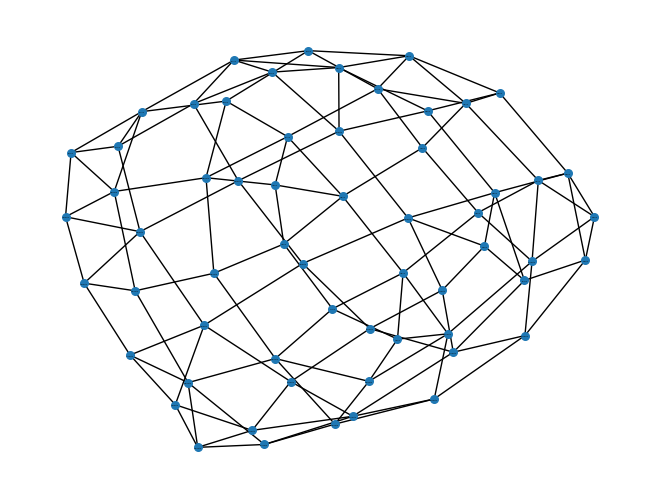

In [85]:
nx.draw(Gs, with_labels=True, node_size=30, font_size=1)
plt.show()

In [ ]:
def binary(n):
    bits = []
    if n == 0:
        return [0]
    while n > 0:
        bits.append(n % 2)
        n //= 2
    return bits

def order(a,b,c):
    for i in range(pow(2,a)):
        for j in range(pow(2,b)):
            for k in range(pow(2,c)):
                x = binary(i)
                while len(x)<a:
                    x.append(0)
                y = binary(j)
                while len(y)<b:
                    y.append(0)
                z = binary(k)
                while len(z)<c:
                    z.append(0)
                CUBE = generate_cube(x, y, z)

def count_f4(cube):
    count = 0
    for i in range(len(x)+2):
        for j in range(len(y)+2):
            if cube[2*i][2*j][0]==4:
                count += 1
            if cube[2*i][2*j][2*len(z)+4]==4:
                count += 1
    return count

def count_f6(cube):

    